In [10]:
import pandas as pd
import re
import json

def get_votes(text):
    pattern = r"([0-9]+) Freispruch - ([0-9]+) Schuldig"
    results = re.search(pattern, text)
    try:
        return int(results.group(1)), int(results.group(2))
    except AttributeError:
        return None, None



In [50]:
%matplotlib inline
import seaborn as sns
import codecs
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderServiceError
import csv
geolocator = Nominatim()

with open("/Users/knut/projects/terror/buehnen.json") as infile:
    data = json.load(infile)

results = []
for line in data:
    entry = {}
    entry["latitude"], entry["longitude"] = line[0]
    entry["votes_free"], entry["votes_jail"] = get_votes(line[2])
    entry["theater"] = line[1]
    if entry["votes_free"] is not None:
        entry["ratio_free"] = entry["votes_free"] / float(entry["votes_free"] + entry["votes_jail"])
        results.append(entry)
        
def encode_or_not(i):
    if isinstance(i, basestring):
        return i.encode('utf8')
    else:
        return i
        
with open("/Users/knut/projects/terror/results.csv", 'w') as outfile:
    fieldnames = results[0].keys()
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    for line in results:
        writer.writerow({k:encode_or_not(v) for k,v in line.items()})

,votes_free,ratio_free,longitude,latitude,votes_jail,population
votes_free,1.000000,0.150329,-0.199568,-0.130975,0.966563,0.282945
ratio_free,0.150329,1.000000,-0.209398,0.184821,-0.030439,-0.286043
longitude,-0.199568,-0.209398,1.000000,0.269620,-0.089860,0.274430
latitude,-0.130975,0.184821,0.269620,1.000000,-0.145993,0.022033
votes_jail,0.966563,-0.030439,-0.089860,-0.145993,1.000000,0.400844
population,0.282945,-0.286043,0.274430,0.022033,0.400844,1.000000


cdu 0.592157456117
spd 0.58564370924
fdp 0.5137142291
gruen 0.6669691379


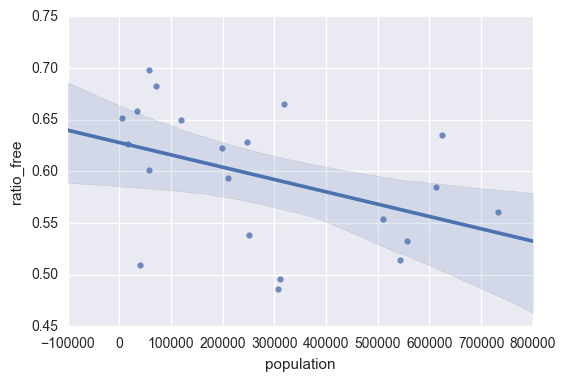

In [61]:
from IPython.display import display

df = pd.read_csv("/Users/knut/projects/terror/results_with_population_and_party.csv")

sns.regplot(x="population", y="ratio_free",
            data=df[df['population'] < 1000000])

display(df.corr())

for party in df['party'].unique():
    mean_free_ratio = df[df['party'] == party]['ratio_free'].mean()
    print party, mean_free_ratio
    
